In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [187]:
Ddos_dataset = pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\target\ml\Cyber_attack\cybersecurity_attacks.csv")

In [188]:
Ddos_dataset.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [189]:
Ddos_dataset.shape

(40000, 25)

In [190]:
Ddos_dataset.describe()

,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


In [191]:
Ddos_dataset['Attack Type'].value_counts()

Attack Type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64

In [192]:
print(Ddos_dataset.columns)


Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')


In [193]:

from sklearn.preprocessing import LabelEncoder
import pandas as pd


le = LabelEncoder()
Ddos_dataset['Attack Type'] = le.fit_transform(Ddos_dataset['Attack Type'])

Ddos_dataset['Alerts/Warnings'] = Ddos_dataset['Alerts/Warnings'].apply(lambda x: 1 if x == 'Alert Triggered' else 0)

Ddos_dataset['Attack Signature'] = Ddos_dataset['Attack Type'].replace({'Known Pattern A': 0, 'Known Pattern B': 1})

Ddos_dataset['Traffic Type'] = Ddos_dataset['Traffic Type'].replace({'HTTP': 0, 'DNS': 1, 'FTP': 2})

Ddos_dataset['Packet Type'] = Ddos_dataset['Packet Type'].replace({'Data': 1, 'Control': 0})

Ddos_dataset['Protocol'] = Ddos_dataset['Protocol'].replace({'ICMP': 0, 'UDP': 1, 'TCP': 2})

Ddos_dataset['Severity Level'] = Ddos_dataset['Severity Level'].replace({'Low': 0, 'Medium': 1, 'High': 2})

Ddos_dataset['Malware Indicators'] = Ddos_dataset['Malware Indicators'].apply(lambda x: 1 if x == 'IoC Detected' else (0 if pd.isna(x) else x))

In [194]:
X = Ddos_dataset.drop(columns=[
    'Timestamp', 'Source IP Address', 'Destination IP Address', 'Source Port',
    'Destination Port', 'Packet Length', 
     'Payload Data', 'Action Taken', 
    'User Information', 'Device Information', 'Network Segment',
    'Geo-location Data', 'Proxy Information', 'Firewall Logs',
    'IDS/IPS Alerts', 'Log Source','Attack Type'
])

Y = Ddos_dataset['Attack Type']




In [195]:
Ddos_dataset.describe()

,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Severity Level
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.00000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,0.996075,781.452725,0.494075,0.99760,0.500000,50.113473,0.498325,0.996975,0.996975,1.004975
std,18560.425604,18574.668842,0.817023,416.044192,0.499971,0.81585,0.500006,28.853598,0.500003,0.817547,0.817547,0.814934
min,1027.000000,1024.000000,0.000000,64.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16850.750000,17094.750000,0.000000,420.000000,0.000000,0.00000,0.000000,25.150000,0.000000,0.000000,0.000000,0.000000
50%,32856.000000,33004.500000,1.000000,782.000000,0.000000,1.00000,0.500000,50.345000,0.000000,1.000000,1.000000,1.000000
75%,48928.250000,49287.000000,2.000000,1143.000000,1.000000,2.00000,1.000000,75.030000,1.000000,2.000000,2.000000,2.000000
max,65530.000000,65535.000000,2.000000,1500.000000,1.000000,2.00000,1.000000,100.000000,1.000000,2.000000,2.000000,2.000000


In [196]:
#Ddos_dataset.groupby('Attack Type').mean()

In [197]:
X.head()


,Protocol,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Signature,Severity Level
0,0,1,0,1,28.67,0,2,0
1,0,1,0,1,51.50,0,2,0
2,1,0,0,1,87.42,1,0,0
3,1,1,0,0,15.79,1,2,1
4,2,1,1,0,0.52,1,0,0


In [198]:
Y.head()

0    2
1    2
2    0
3    2
4    0
Name: Attack Type, dtype: int32

In [199]:
print(X)
print(Y)

       Protocol  Packet Type  Traffic Type  Malware Indicators  \
0             0            1             0                   1   
1             0            1             0                   1   
2             1            0             0                   1   
3             1            1             0                   0   
4             2            1             1                   0   
...         ...          ...           ...                 ...   
39995         1            0             0                   1   
39996         1            0             0                   1   
39997         1            1             1                   1   
39998         1            1             2                   1   
39999         0            0             0                   0   

       Anomaly Scores  Alerts/Warnings  Attack Signature  Severity Level  
0               28.67                0                 2               0  
1               51.50                0                 2 

In [200]:
scaler = StandardScaler()

In [201]:
scaler.fit(X)

StandardScaler()

In [202]:
#standardized_data = scaler.transform(X)

In [203]:

#print(standardized_data)

In [204]:
#X = standardized_data
#Y = Ddos_dataset['Attack Type']

In [205]:
print(X)
print(Y)

       Protocol  Packet Type  Traffic Type  Malware Indicators  \
0             0            1             0                   1   
1             0            1             0                   1   
2             1            0             0                   1   
3             1            1             0                   0   
4             2            1             1                   0   
...         ...          ...           ...                 ...   
39995         1            0             0                   1   
39996         1            0             0                   1   
39997         1            1             1                   1   
39998         1            1             2                   1   
39999         0            0             0                   0   

       Anomaly Scores  Alerts/Warnings  Attack Signature  Severity Level  
0               28.67                0                 2               0  
1               51.50                0                 2 

In [206]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.9, stratify=Y, random_state=42)

In [207]:
print(X.shape,X_train.shape,X_test.shape)

(40000, 8) (4000, 8) (36000, 8)


In [208]:
X_train.head()

,Protocol,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Signature,Severity Level
8195,0,1,0,1,93.17,1,2,1
3073,0,1,0,1,97.82,0,2,2
19803,1,1,2,0,88.13,0,2,1
7591,1,1,1,0,69.86,1,2,2
24701,1,0,2,1,92.11,0,1,0


In [209]:
Y_train.head()

8195     2
3073     2
19803    2
7591     2
24701    1
Name: Attack Type, dtype: int32

In [210]:
X_test.head()

,Protocol,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Signature,Severity Level
29517,1,0,2,1,62.11,0,2,2
19161,1,0,1,1,61.65,1,2,2
21317,1,1,2,1,86.77,1,1,0
12986,2,0,2,0,33.97,0,1,2
11778,1,1,0,1,26.46,1,1,1


In [211]:
Y_test.head()

29517    2
19161    2
21317    1
12986    1
11778    1
Name: Attack Type, dtype: int32

In [212]:
print(X_train)
print(Y_train)

       Protocol  Packet Type  Traffic Type  Malware Indicators  \
8195          0            1             0                   1   
3073          0            1             0                   1   
19803         1            1             2                   0   
7591          1            1             1                   0   
24701         1            0             2                   1   
...         ...          ...           ...                 ...   
22934         2            0             2                   1   
34890         0            1             1                   1   
23164         1            0             0                   1   
22994         2            0             2                   1   
13053         2            1             2                   1   

       Anomaly Scores  Alerts/Warnings  Attack Signature  Severity Level  
8195            93.17                1                 2               1  
3073            97.82                0                 2 

In [213]:
classifier=svm.SVC(kernel='linear')

In [214]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [215]:
X_train_prediction=classifier.predict(X_train)
training_dataset_accuracy= accuracy_score(X_train_prediction,Y_train)

In [216]:
print('Accuracy for training dataset achived: ',training_dataset_accuracy*100)

Accuracy for training dataset achived:  100.0


In [217]:
X_test_prediction=classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [218]:
print('Accuracy for test dataset achived: ',test_data_accuracy*100)

Accuracy for test dataset achived:  100.0


In [219]:
input_data=(1,0,0,0,1.60,0,1,0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = classifier.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
    print('Ddos is detected')
elif(prediction[0]==1):
  print('Intrusion detected')
elif(prediction[0]==2):
  print('Malware detected')

[1]
Intrusion detected


c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


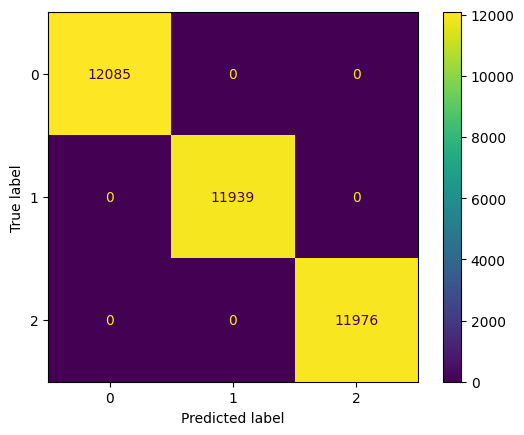

In [220]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Y_pred = classifier.predict(X_test)  
cm = confusion_matrix(Y_test, Y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()


In [221]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier, X, Y, cv=5)  
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0


In [222]:
from sklearn.metrics import classification_report

Y_pred = classifier.predict(X_test)  
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12085
           1       1.00      1.00      1.00     11939
           2       1.00      1.00      1.00     11976

    accuracy                           1.00     36000
   macro avg       1.00      1.00      1.00     36000
weighted avg       1.00      1.00      1.00     36000

